In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)

In [2]:
train_inpatient = pd.read_csv("./data/Train_Inpatientdata-1542865627584.csv")

In [3]:
train_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [4]:
train_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [5]:
train_inpatient.isna().sum()/len(train_inpatient) * 100

BeneID                  0.000000
ClaimID                 0.000000
ClaimStartDt            0.000000
ClaimEndDt              0.000000
Provider                0.000000
                         ...    
ClmProcedureCode_2     86.524683
ClmProcedureCode_3     97.615753
ClmProcedureCode_4     99.713396
ClmProcedureCode_5     99.977764
ClmProcedureCode_6    100.000000
Length: 30, dtype: float64

In [6]:
train_inpatient.duplicated().sum()

np.int64(0)

In [7]:
train_beneficiary = pd.read_csv("./data/Train_Beneficiarydata-1542865627584.csv")

In [8]:
train_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [9]:
train_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [10]:
train_beneficiary.duplicated().sum()

np.int64(0)

In [11]:
train_outpatient = pd.read_csv("./data/Train_Outpatientdata-1542865627584.csv")

In [12]:
train_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [13]:
train_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [14]:
train_outpatient.shape

(517737, 27)

In [15]:
train_outpatient.isna().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
                          ...  
ClmProcedureCode_4       517735
ClmProcedureCode_5       517737
ClmProcedureCode_6       517737
DeductibleAmtPaid             0
ClmAdmitDiagnosisCode    412312
Length: 27, dtype: int64

In [16]:
train_outpatient.duplicated().sum()

np.int64(0)

In [17]:
train_provider = pd.read_csv("./data/Train-1542865627584.csv")

In [18]:
train_provider['PotentialFraud'].value_counts(normalize=True)

PotentialFraud
No     0.90647
Yes    0.09353
Name: proportion, dtype: float64

## Analysis

### Inpatient Data Exploration

In [20]:
train_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [21]:
for i in ['ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt']:
    train_inpatient[i]=pd.to_datetime(train_inpatient[i])

In [22]:
train_inpatient['hospital_stay_days'] = (train_inpatient['DischargeDt'] - train_inpatient['AdmissionDt']).dt.days

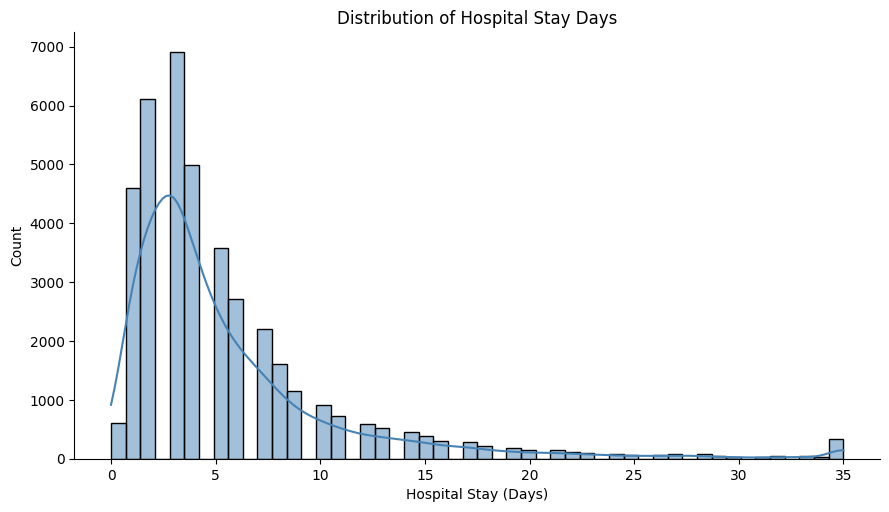

In [30]:
sns.displot(data=train_inpatient, x='hospital_stay_days', bins=50, kde=True, color='steelblue', height=5, aspect=1.8)
plt.xlabel('Hospital Stay (Days)')
plt.title('Distribution of Hospital Stay Days')
plt.show()

In [31]:
train_inpatient['claim_duration_days'] = (train_inpatient['ClaimEndDt'] - train_inpatient['ClaimStartDt']).dt.days

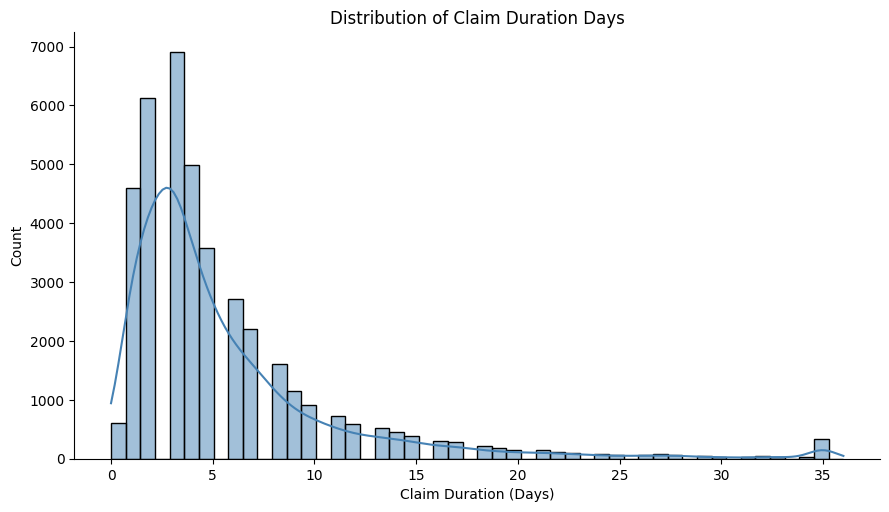

In [32]:
sns.displot(data=train_inpatient, x='claim_duration_days', bins=50, kde=True, color='steelblue', height=5, aspect=1.8)
plt.xlabel('Claim Duration (Days)')
plt.title('Distribution of Claim Duration Days')
plt.show()

In [33]:
train_inpatient['num_diagnoses'] = train_inpatient.filter(like='ClmDiagnosisCode_').notna().sum(axis=1)
train_inpatient['num_procedures'] = train_inpatient.filter(like='ClmProcedureCode_').notna().sum(axis=1)

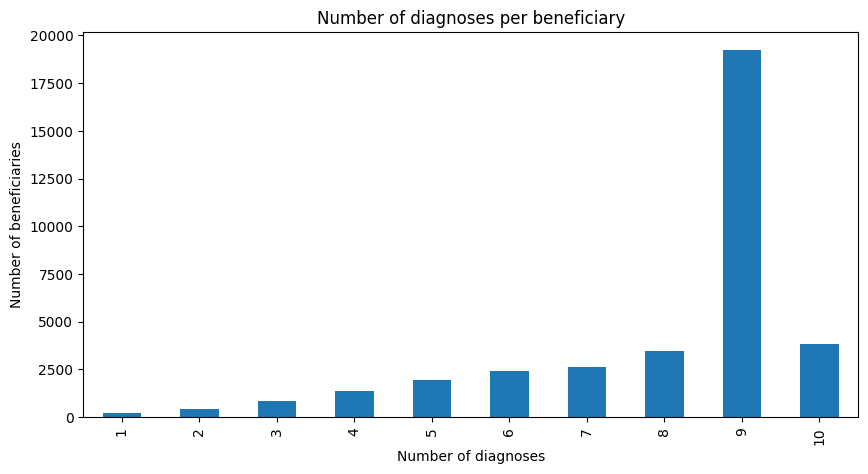

In [37]:
train_inpatient.groupby(['num_diagnoses'])['BeneID'].nunique().plot(kind='bar', figsize=(10, 5))
plt.xlabel('Number of diagnoses')
plt.ylabel('Number of beneficiaries')
plt.title('Number of diagnoses per beneficiary')
plt.show()

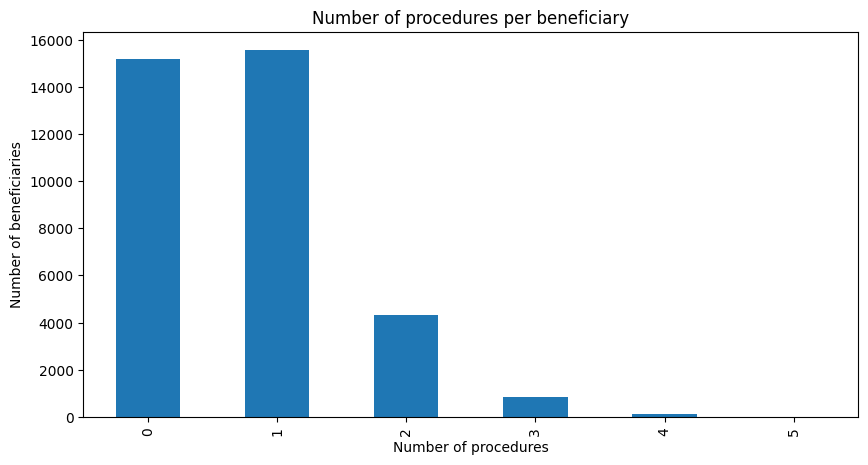

In [38]:
train_inpatient.groupby(['num_procedures'])['BeneID'].nunique().plot(kind='bar', figsize=(10, 5))
plt.xlabel('Number of procedures')
plt.ylabel('Number of beneficiaries')
plt.title('Number of procedures per beneficiary')
plt.show()

In [39]:
train_beneficiary.loc[:, train_beneficiary.columns.str.contains('ChronicCond_')] = \
train_beneficiary.filter(like='ChronicCond_').replace({1: 1, 2: 0})

In [42]:
gender_map = {1: 'Male', 2: 'Female'}
race_map = {1: 'White', 2: 'Black', 3: 'Other', 5: 'Hispanic'}
# Map values to labels
train_beneficiary['Gender_Label'] = train_beneficiary['Gender'].map(gender_map)
train_beneficiary['Race_Label'] = train_beneficiary['Race'].map(race_map)

In [43]:
train_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Gender_Label,Race_Label
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,Male,White
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50,Female,White
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,0,0,0,0,0,0,1,0,0,0,0,0,90,40,Male,White
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,Male,White
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,0,0,0,0,1,0,1,0,0,0,0,0,0,1790,1200,Male,White


In [45]:
train_inpatient = train_inpatient.merge(train_beneficiary, on='BeneID', how='left')

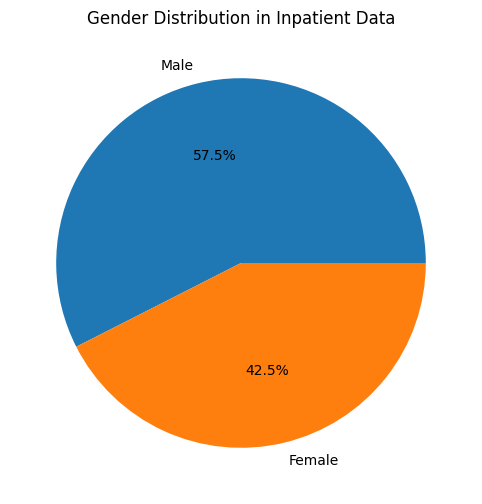

In [48]:
plt.figure(figsize=(10, 6))
plt.pie(train_inpatient['Gender_Label'].value_counts(), labels=train_inpatient['Gender_Label'].unique(), autopct='%1.1f%%')
plt.title('Gender Distribution in Inpatient Data')
plt.show()

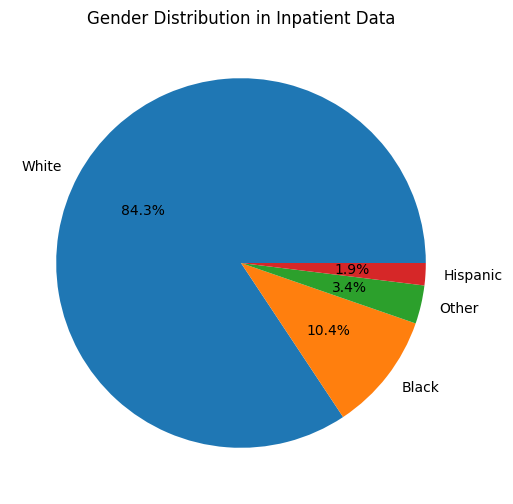

In [49]:
plt.figure(figsize=(10, 6))
plt.pie(train_inpatient['Race_Label'].value_counts(), labels=train_inpatient['Race_Label'].unique(), autopct='%1.1f%%')
plt.title('Gender Distribution in Inpatient Data')
plt.show()

In [51]:
train_inpatient['DOB'] = pd.to_datetime(train_inpatient['DOB'])
train_inpatient['Age_at_Claim'] = ((pd.to_datetime(train_inpatient['ClaimStartDt']) - pd.to_datetime(train_inpatient['DOB'])).dt.days / 365.25).astype(int)

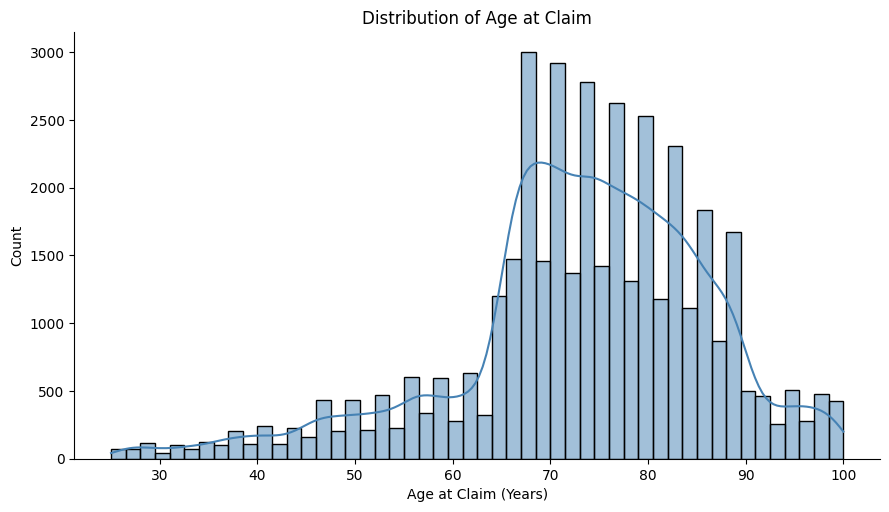

In [54]:
sns.displot(data=train_inpatient, x='Age_at_Claim', bins=50, kde=True, color='steelblue', height=5, aspect=1.8)
plt.xlabel('Age at Claim (Years)')
plt.title('Distribution of Age at Claim')
plt.show()

In [62]:
train_inpatient['age_bin'] = pd.cut(train_inpatient['Age_at_Claim'], bins=[-1, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 1e10], labels=["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99","100+"])

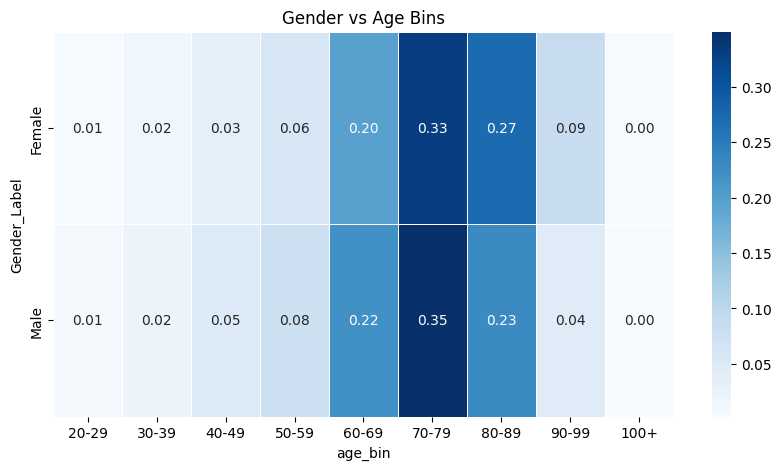

In [74]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(train_inpatient['Gender_Label'],train_inpatient['age_bin'],normalize='index'),annot=True, fmt='.2f', cmap='Blues', linewidths=0.5)
plt.title('Gender vs Age Bins')
plt.show()

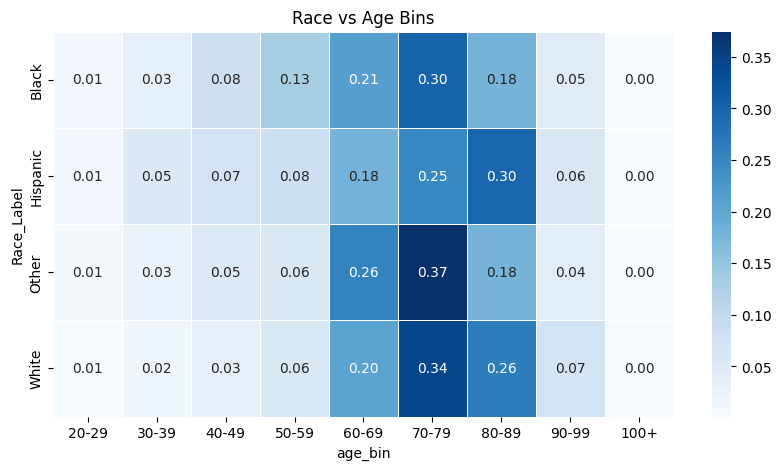

In [75]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(train_inpatient['Race_Label'],train_inpatient['age_bin'],normalize='index'),annot=True, fmt='.2f', cmap='Blues', linewidths=0.5)
plt.title('Race vs Age Bins')
plt.show()

### Outpatient Data Exploration

In [76]:
train_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [77]:
for i in ['ClaimStartDt','ClaimEndDt']:
    train_outpatient[i]=pd.to_datetime(train_outpatient[i])

In [78]:
train_outpatient['num_diagnoses'] =train_outpatient.filter(like='ClmDiagnosisCode_').notna().sum(axis=1)
train_outpatient['num_procedures'] =train_outpatient.filter(like='ClmProcedureCode_').notna().sum(axis=1)

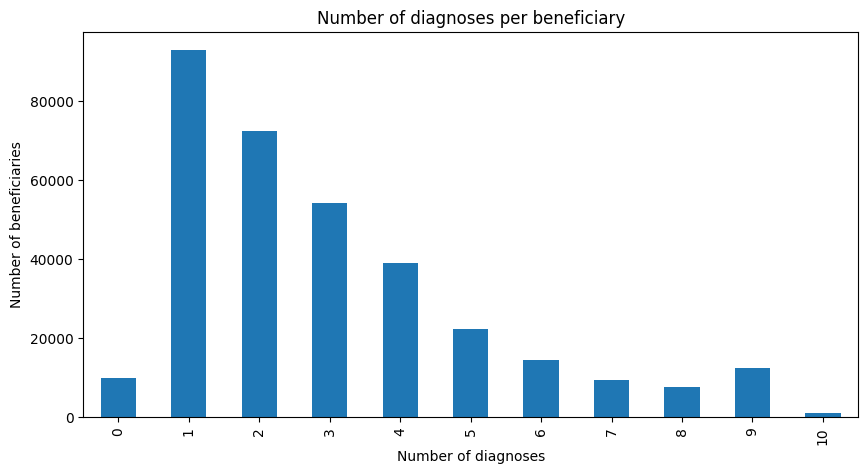

In [79]:
train_outpatient.groupby(['num_diagnoses'])['BeneID'].nunique().plot(kind='bar', figsize=(10, 5))
plt.xlabel('Number of diagnoses')
plt.ylabel('Number of beneficiaries')
plt.title('Number of diagnoses per beneficiary')
plt.show()

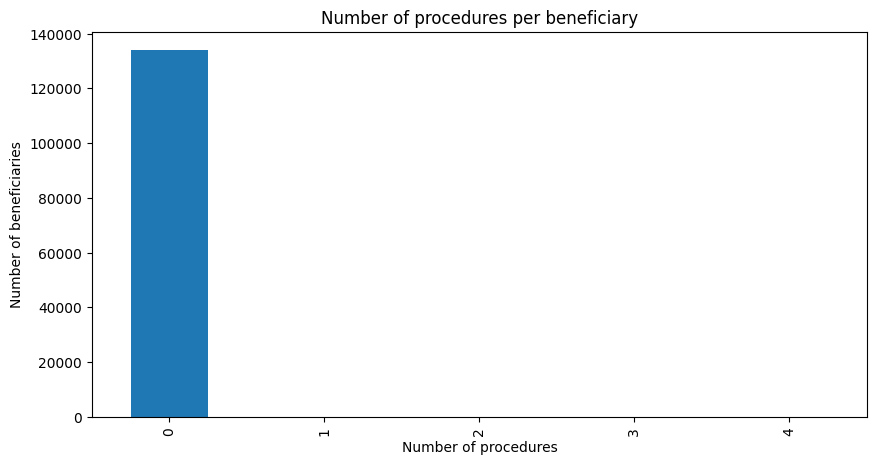

In [80]:
train_outpatient.groupby(['num_procedures'])['BeneID'].nunique().plot(kind='bar', figsize=(10, 5))
plt.xlabel('Number of procedures')
plt.ylabel('Number of beneficiaries')
plt.title('Number of procedures per beneficiary')
plt.show()

In [81]:
train_outpatient['claim_duration_days'] = (train_outpatient['ClaimEndDt'] - train_outpatient['ClaimStartDt']).dt.days

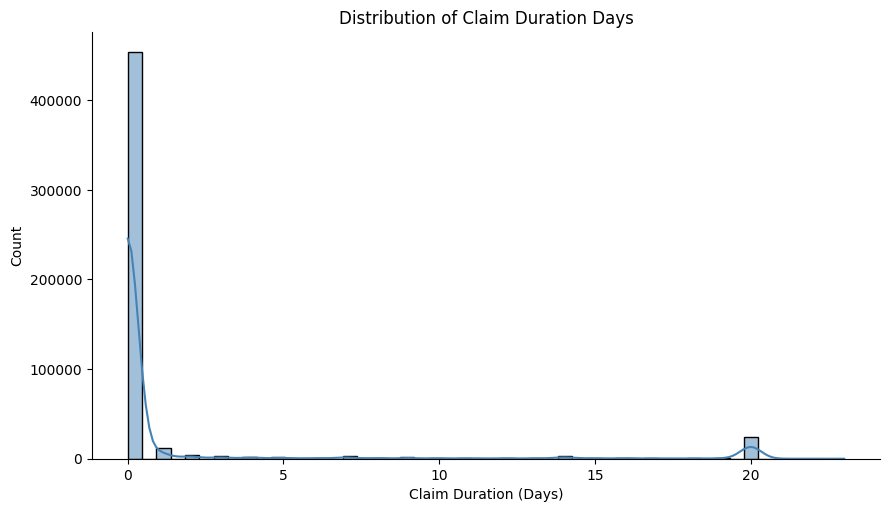

In [82]:
sns.displot(data=train_outpatient, x='claim_duration_days', bins=50, kde=True, color='steelblue', height=5, aspect=1.8)
plt.xlabel('Claim Duration (Days)')
plt.title('Distribution of Claim Duration Days')
plt.show()

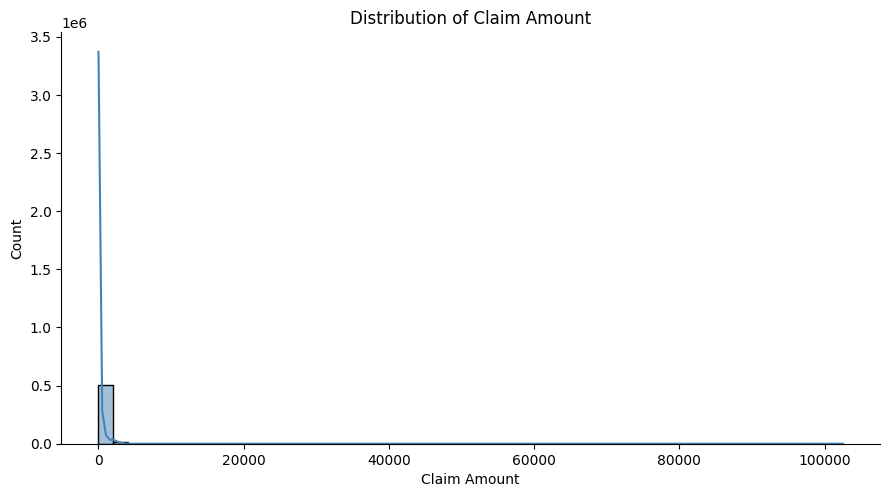

In [84]:
sns.displot(data=train_outpatient, x='InscClaimAmtReimbursed', bins=50, kde=True, color='steelblue', height=5, aspect=1.8)
plt.xlabel('Claim Amount')
plt.title('Distribution of Claim Amount')
plt.show()

In [85]:
train_outpatient = train_outpatient.merge(train_beneficiary, on='BeneID', how='left')

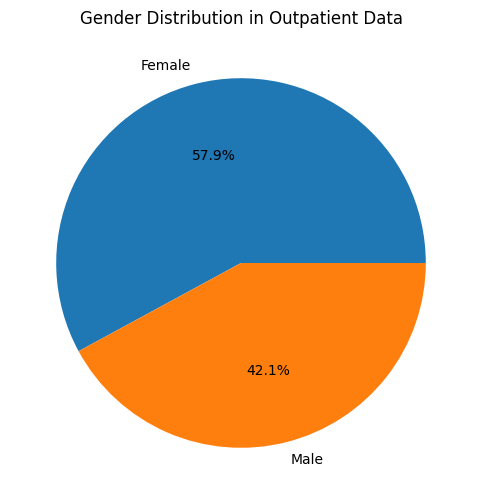

In [86]:
plt.figure(figsize=(10, 6))
plt.pie(train_outpatient['Gender_Label'].value_counts(), labels=train_outpatient['Gender_Label'].unique(), autopct='%1.1f%%')
plt.title('Gender Distribution in Outpatient Data')
plt.show()

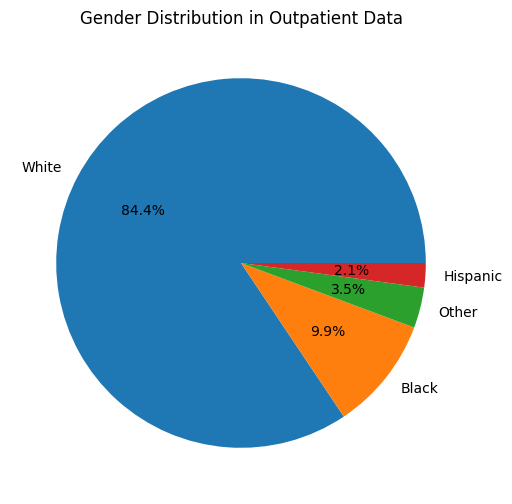

In [87]:
plt.figure(figsize=(10, 6))
plt.pie(train_outpatient['Race_Label'].value_counts(), labels=train_outpatient['Race_Label'].unique(), autopct='%1.1f%%')
plt.title('Gender Distribution in Outpatient Data')
plt.show()

In [88]:
train_outpatient['DOB'] = pd.to_datetime(train_outpatient['DOB'])
train_outpatient['Age_at_Claim'] = ((pd.to_datetime(train_outpatient['ClaimStartDt']) - pd.to_datetime(train_outpatient['DOB'])).dt.days / 365.25).astype(int)

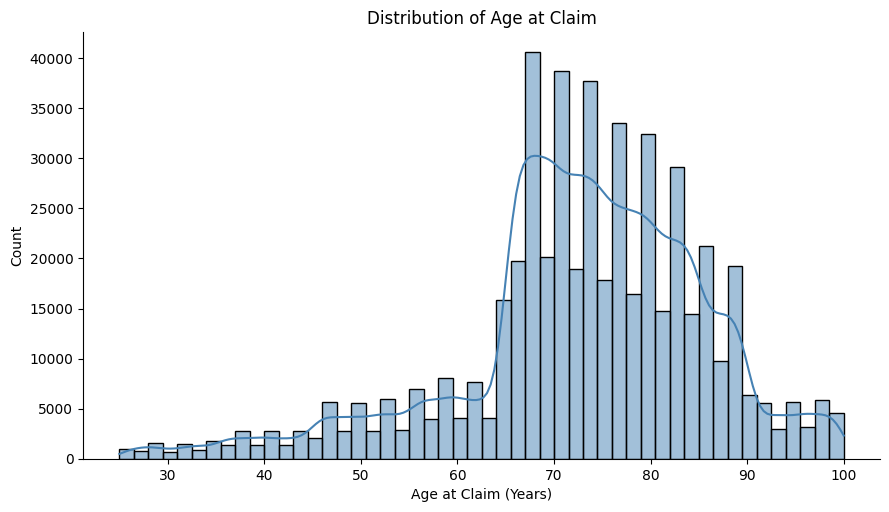

In [89]:
sns.displot(data=train_outpatient, x='Age_at_Claim', bins=50, kde=True, color='steelblue', height=5, aspect=1.8)
plt.xlabel('Age at Claim (Years)')
plt.title('Distribution of Age at Claim')
plt.show()